In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [3]:
#Convierte los valore dados en términos de rangoos, en un númeor. Toma el valor máximo del rango como el valor.
#x: arreglo con los valores en rango (String), maximo: valor máximo de lso valores
#magnitud:orden de magnitud de los números. 
def quitarRango(x, maximo, magnitud):
	for i in range(x.shape[0]):
		if (x[i]== maximo+'+'):
			cadena=str.split(x[i], ','	)
			if (np.array(cadena).size >1):
				x[i]=int(cadena[0])*magnitud
			else:
				x[i]=int(maximo)
		else:
			cadena1= str.split(x[i], '-'	)
			x[i]=cadena1[1]
			cadena1=str.split(x[i], ','	)
			x[i] = int(cadena1[0])*magnitud
	return x

#Hace una lista de todo los valores distintos del arreglo que se le pasa pr parametro
def crearLista(x):
	xtem =x
	valores = []
	for val in x:
		i=0
		igual =0
		while (igual ==0 and i< len(valores)):
			if(val==valores[i]):		
				igual =1
			i+=1
		if(igual ==0):
			valores.append(val)
	return valores

#Suprime de los arreglos dados por pramentro los datos que corresponden al valor val en x1
def quitarValor(val, x1, x2, x3, x4=None):
	ii=x1 != val
	x1=x1[ii]
	x2=x2[ii]
	x3=x3[ii]
	if(x4 is not None):
		x4=x4[ii]
		return x1,x2,x3,x4
	else:
		return x1,x2,x3 
	
#Cuenta el numero de vece que el valor val aparece en el arreglo x
def contar(val,x):
	contador =0
	for i in x:
		if (i==val):
			contador+=1
	return contador
	
    
#Halla el número de datos clasificados de forma erronea por el modea LDA
def hallarFallo(y, x1, x2):
	x= np.zeros((y.size,2))
	x[:,0]=x1
	x[:,1]=x2

	X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
	clf = LinearDiscriminantAnalysis()
	clf.fit(X_train, y_train)
	prediccion=clf.predict(X_test)
	result= prediccion ==y_test
	fallos = contar((2==1),result)
	return prediccion, fallos
	
    
#Vuelve el arreglo x una varibel dommy, valores donde aparezca valNot, poner 0, de lo contrario pone 1.
def dummyVariable(valNot, x):
	tem = np.ones(x.size)
	for i in range(x.size):
		if (x[i].find(valNot) != -1):
			tem[i]=0
	return tem

In [4]:
#Cargaos los datos:

#Q1:genero Q2: rango de edad, Q3:país de recidencia, Q4:nivel de estudios, Q5:Undergraduate major, 
#Q6:designation or Title, Q7:Industry of current Employer, Q9: Yearly Compensation in $USD, 
#Q10:Status of ML Methods in Employers business.

archivo= pd.read_csv("multipleChoiceResponses.csv", low_memory=False)
data=archivo[['Q1','Q2','Q3','Q4','Q5','Q6', 'Q7', 'Q9', 'Q10']]
data= data.dropna()


# 1. Salario Vs. Edad
Analizamos el comportaiendo de la característica salario en función de la edad.

**a)**. Vemos si es posible predecir el genero a partir del salario y la edad

In [5]:
#Arreglamos los datos para ser analizados
salario = np.array(data['Q9'])
salario= salario[1:]
edad=np.array(data['Q2'])
edad = edad[1:]
genero=np.array(data['Q1'])
genero = genero[1:]
salario,edad,genero=quitarValor('I do not wish to disclose my approximate yearly compensation', salario, edad, genero)
genero, edad,salario=quitarValor('Prefer not to say', genero, edad, salario)
genero, edad,salario=quitarValor('Prefer to self-describe', genero, edad, salario)
salario= quitarRango(salario,'500,000',1000) 
edad= quitarRango(edad, '80', 1)

#Analizamos los datos
prediccionGe, fallosGe=hallarFallo(genero, salario, edad)

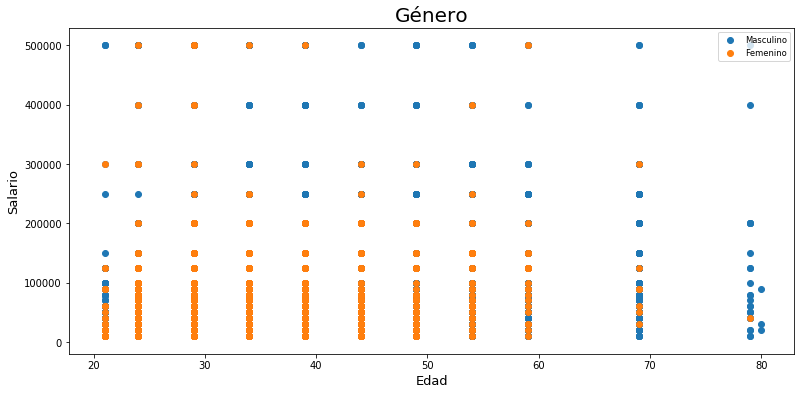

In [6]:
#Grafica
femenino=genero== 'Female'
masculino = genero== 'Male'
salarioFem=salario[femenino]
edadFem=edad[femenino]
salarioMas=salario[masculino]
edadMas=edad[masculino]	
	
plt.figure(figsize=(13,6))
plt.scatter(edadMas,salarioMas, label='Masculino')
plt.scatter(edadFem, salarioFem, label='Femenino')
plt.xlabel('Edad', fontsize = 13)
plt.ylabel('Salario', fontsize = 13)
plt.legend(fontsize='small', scatterpoints= 1, loc='upper right')
plt.title("Género", fontsize = 20)
plt.show()


 **b)**. Vemos si es posible predecir la región de una persona a partir de conoceer su salario y edad

In [7]:
#Arreglamos los datos para ser analizados
salario = np.array(data['Q9'])
salario= salario[1:]
edad=np.array(data['Q2'])
edad = edad[1:]
pais=np.array(data['Q3'])
pais = pais[1:]
salario,edad,pais=quitarValor('I do not wish to disclose my approximate yearly compensation', salario, edad, pais)
pais, salario, edad= quitarValor('I do not wish to disclose my location', pais, salario, edad)
paises = crearLista(pais)
print(paises)
salario= quitarRango(salario,'500,000',1000) 
edad= quitarRango(edad, '80', 1)



['Indonesia', 'United States of America', 'India', 'Chile', 'Hungary', 'France', 'Argentina', 'Japan', 'Colombia', 'Nigeria', 'Spain', 'Other', 'Iran, Islamic Republic of...', 'United Kingdom of Great Britain and Northern Ireland', 'Turkey', 'Poland', 'Kenya', 'Denmark', 'Netherlands', 'Sweden', 'Ukraine', 'Canada', 'Australia', 'Russia', 'Italy', 'Mexico', 'Germany', 'Singapore', 'Brazil', 'China', 'South Africa', 'South Korea', 'Malaysia', 'Hong Kong (S.A.R.)', 'Portugal', 'Thailand', 'Morocco', 'Pakistan', 'Tunisia', 'Ireland', 'Israel', 'Switzerland', 'Bangladesh', 'Romania', 'Austria', 'Belarus', 'Viet Nam', 'Philippines', 'Belgium', 'New Zealand', 'Norway', 'Finland', 'Czech Republic', 'Egypt', 'Greece', 'Peru', 'Republic of Korea']


In [8]:
#Cremos nuevos grupos para clasificar los paises

#Nota: arbitrariamente se pone Rusia en europa
regiones={}
regiones['Europa'] = ['France', 'India', 'Hungary', 'Spain', 'United Kingdom of Great Britain and Northern Ireland', 'Poland', 'Denmark', 'Netherlands','Sweden', 'Russia', 'Italy', 'Germany', 'Portugal', 'Ireland', 'Switzerland', 'Romania', 'Austria', 'Belarus', 'Belgium', 'Norway', 'Finland', 'Czech Republic','Greece']
regiones['Asia'] = ['Indonesia', 'Japan','Singapore', 'China', 'South Korea', 'Malaysia', 'Hong Kong (S.A.R.)', 'Thailand', 'Morocco','Bangladesh', 'Viet Nam', 'Philippines',  'Republic of Korea']
regiones['Norte America'] = ['United States of America', 'Canada', 'Mexico']
regiones['Sur America'] = ['Chile', 'Argentina', 'Colombia', 'Brazil', 'Peru']
regiones['Africa'] = ['Nigeria', 'Kenya', 'South Africa', 'Tunisia', 'Egypt']
regiones['Otros']=['Other', 'Australia', 'New Zealand']
regiones['Oriente Medio']=['Iran, Islamic Republic of...', 'Turkey', 'Pakistan', 'Israel']

for i in range (pais.size):
	for reg in regiones:
		if (pais[i] in regiones[reg]):
			pais[i]=reg
            
#Analizamos los datos:
prediccionPa, fallosPa=hallarFallo(pais, salario, edad)

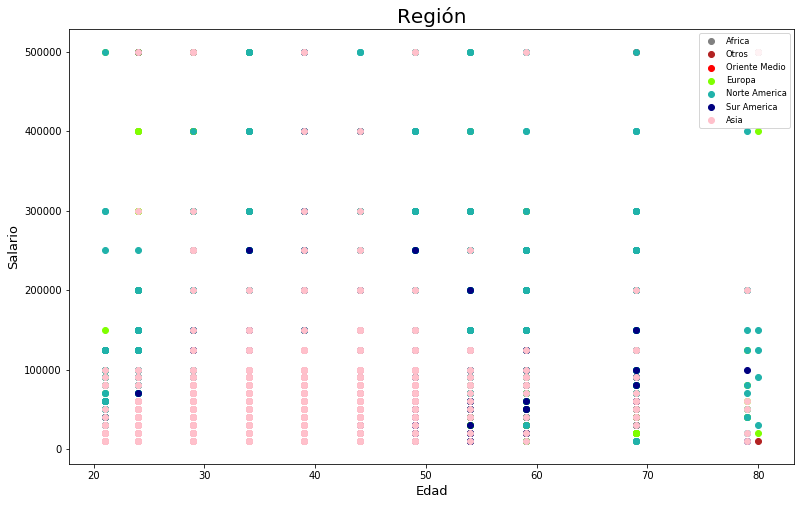

In [9]:
#Grafica
colores=['gray','firebrick', 'red', 'chartreuse', 'lightseagreen','navy','pink']
i=0
plt.figure(figsize=(13,8))
for reg in regiones:
	ii=pais== reg
	edadTem=edad[ii]
	salarioTem=salario[ii]	
	plt.scatter(edadTem,salarioTem, label=reg, c=colores[i])
	i+=1

plt.xlabel('Edad', fontsize = 13)
plt.ylabel('Salario', fontsize = 13)
plt.legend(fontsize='small', scatterpoints= 1, loc='upper right')
plt.title("Región", fontsize=20)
plt.show()

 **c).** Vemos si a partir del salario y la edad se puede predecir que tanto ha estudiado una persona

In [10]:
#Arreglamos los datos para ser analizados
salario = np.array(data['Q9'])
salario= salario[1:]
edad=np.array(data['Q2'])
edad = edad[1:]
estudios=np.array(data['Q4'])
estudios= estudios[1:]
salario, edad,estudios=quitarValor('I do not wish to disclose my approximate yearly compensation', salario, edad, estudios)
estudios, salario, edad=quitarValor('I prefer not to answer', estudios, salario, edad)
grados = crearLista(estudios)
salario= quitarRango(salario,'500,000',1000) 
edad= quitarRango(edad, '80', 1)

#Analizamos los datos:
prediccionEst, fallosEst=hallarFallo(estudios, salario, edad)



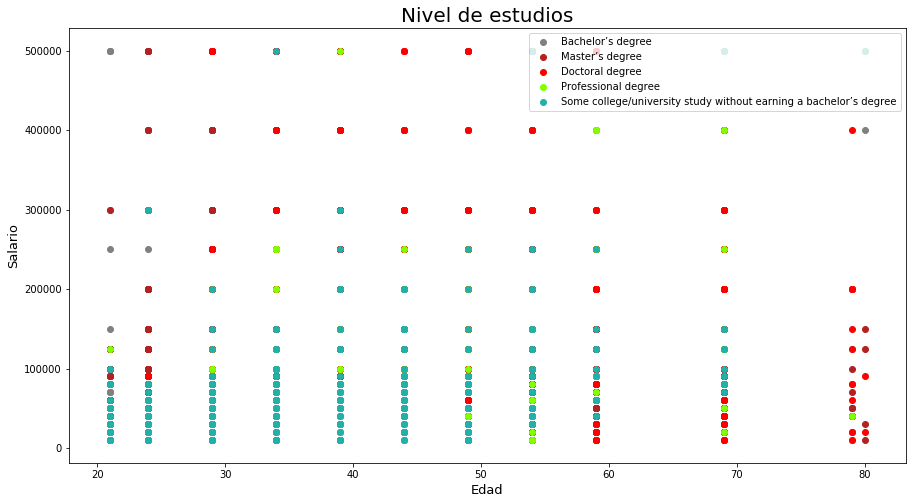

In [11]:
#Grafica
colores=['gray','firebrick', 'red', 'chartreuse', 'lightseagreen','navy','pink']
i=0
plt.figure(figsize=(15,8))
for est in grados:
	ii=estudios== est
	edadTem=edad[ii]
	salarioTem=salario[ii]	
	plt.scatter(edadTem,salarioTem, label=est, c=colores[i])
	i+=1

plt.xlabel('Edad', fontsize=13)
plt.ylabel('Salario', fontsize=13)
plt.legend(fontsize='medium', scatterpoints= 1)
plt.title("Nivel de estudios", fontsize=20)
plt.show()

Realizamos grafica que muestra cuantas clasificaciones erroneas se obtiene para este modelo con los dato de test.

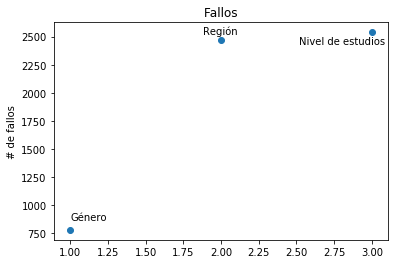

In [33]:
y=[fallosGe, fallosPa,fallosEst]
x=[1,2,3]
plt.scatter(x,y)
plt.annotate('Género', xy=(1,fallosGe+90))
plt.annotate('Región', xy=(2-0.12,fallosPa+50))
plt.annotate('Nivel de estudios', xy=(3-0.48,fallosEst-110))
plt.ylabel('# de fallos')
plt.title("Fallos")
plt.savefig("SalaraioVsEdad.png")
plt.show()

Realizamos linear discrimant analysis para el comportamiento del salario en función de la edad. Especialmente, analizamos si es posible a partir de estos dos carcteristcas predecir el *género*, *la región de residencia* y el *nivel de estudios*. En las primeras tres graficas de Salarios vs Edad se muestra la caracteristica salario en función de la edad y se dividen los datos para cada uno de los tres casos de que nos interesa predecir. Además, en la cuarta gráfica, se muestra el numero de personas clasificado de forma erroenea para cada carateristica con este modelo en el conjuto de prueba. De esta manera, llegamso a la conclusiónque la caractristica que mejor se predice a partir del salario y la edad, es el género. Esto resulta sorpendente, dado que sería de esperar en el marco de la igualadad, que el genero no sea una crateristica que determiante salario a partir de la edad.

# 2. Uso de ML:

Analizamso el uso de Maching learnig a partir de las caracteriticas *salario*, *genero* y *edad*.

In [34]:
#Arreglamos los datos para ser analizados 
salario = np.array(data['Q9'])
salario= salario[1:]
edad=np.array(data['Q2'])
edad = edad[1:]
genero=np.array(data['Q1'])
genero = genero[1:]
usoML=np.array(data['Q10'])
usoML = usoML[1:]
usos=crearLista(usoML)
generos=crearLista(genero)
salario,edad,genero, usoML=quitarValor('I do not wish to disclose my approximate yearly compensation', salario, edad, genero,usoML)
genero, edad,salario, usoML=quitarValor('Prefer not to say', genero, edad, salario, usoML)
genero, edad,salario, usoML=quitarValor('Prefer to self-describe', genero, edad, salario, usoML)
salario= quitarRango(salario,'500,000',1000) 
edad= quitarRango(edad, '80', 1)
usoML=dummyVariable('not', usoML)
genero=dummyVariable('Male', genero)


In [36]:
#Analizamos los datos

x= np.zeros((usoML.size,3))
x[:,0]=salario
x[:,1]=edad
x[:,2]=genero

clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x,usoML)
coeficientes = clf.coef_[0]

print('Realizmos una regresión lógisitica para el suso de Maching Learning (ML), con las variables de salarario, dedad y género. Los coeficientes resultantes son ' , coeficientes[0] ,', ' ,coeficientes[1] ,' y ', coeficientes[2] , ' respectivamente. Lo cual nos indica que aunuqe la depnedencia es pequeña, la mayor dependencia (el cambio del uso del ML con la varibles) está dada por el salario de los empleados.')


2. Realizmos una regresión lógisitica para el suso de Maching Learning (ML), con las variables de salarario, dedad y género. Los coeficientes resultantes son  3.1802534472032884e-06 ,  -2.1912735046612778e-10  y  -1.7176339807986525e-11  respectivamente. Lo cual nos indica que aunuqe la depnedencia es pequeña, la mayor dependencia (el cambio del uso del ML con la varibles) está dada por el salario de los empleados.
